In [8]:
# Import

#General
import numpy as np
import itertools

# System
import os,fnmatch
import subprocess

# Visualization
# import seaborn #visualization library, must be imported before all other plotting libreries
import matplotlib.pyplot as plt
from IPython.core.display import HTML, display

# Machine Learning
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score, precision_score, accuracy_score
from sklearn.metrics import confusion_matrix, f1_score, classification_report

# Random Seed
from numpy.random import seed
seed(1)

# Audio 
import librosa.display, librosa


# unorgonized:
import librosa
import numpy as np
import IPython.display as ipd
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import librosa, librosa.display
import IPython as ip
import IPython.display as ipd
import wave
import scipy.signal as sig
import scipy.io as wavfile
from python_speech_features import mfcc, logfbank
from tqdm import tqdm

import pandas as pd
import decimal
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, log_loss, classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.multiclass import OneVsRestClassifier

from sklearn import model_selection
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

import warnings
warnings.filterwarnings('ignore')

import os
from pathlib import Path
import os
import numpy as np
from scipy.io import wavfile
from tqdm import tqdm
import librosa.display, librosa

# Configurations
path= r"audio"

fs = 44100         # Sampling Frequency

print(f'Working from \n     {os.getcwd()} \nenviroment')


Working from 
     c:\Users\shushu\Desktop\Sorona_Wave 
enviroment


Global functions

In [9]:
# Functions : compare_arrays ; binary_encoding ; ones_count ; normalize ; scatter_plot ; cm_plot ; roc_plot
def compare_arrays(a, b):
        result = []
        loss = 0
        for i in a:
                for j in b:
                        if decimal.Decimal(str(i)).quantize(decimal.Decimal('0.01')) == decimal.Decimal(str(j)).quantize(decimal.Decimal('0.01')):
                                if row not in result:
                                        loss += 1
                                        result.append(round(i, 3))
                                        break
        return sorted(set(result)), loss

#test
# a = [1, 2, 3, 4.56, 5.567, 6.874433]
# b = [6, 7, 8, 4.53, 2, 5.568, 6.873343345]
# print(compare_arrays(a, b))  # Output: [5.56, 6.87]


def binary_encoding(X,y):
    encoder = LabelEncoder()
    encoder.fit(y)
    y = encoder.transform(y)

    ### Sandardization of data ###
    ### We does not standardize the Target variable for classification
    PredictorScaler=StandardScaler()
    
    # Storing the fit object for later reference
    PredictorScalerFit=PredictorScaler.fit(X)
    
    # Generating the standardized values of X and y
    X = PredictorScalerFit.transform(X)
    return X, y


def ones_count(y):
    count = 0
    for i in y:
        if i == 1:
            count += 1
    return count

def count_objects(lst):
    counts = {}
    for item in lst:
        if item in counts:
            counts[item] += 1
        else:
            counts[item] = 1
    return counts

def normalize(arr):
    old_min = np.min(arr)
    old_max = np.max(arr)
    new_min = 0
    new_max = 1
    new_arr = ((arr - old_min) / (old_max - old_min)) * (new_max - new_min) + new_min
    return new_arr

def scatter_plot(X, y, k = 1, rows = 7, cols = 7):
    fig, axs = plt.subplots(rows, cols, figsize=(20, 20))
    for i in range(rows):
        for j in range(cols):
            # if (i != j):
            plt.subplot(rows, cols, k)
            plt.scatter(X[:,i], X[:,j], c = y)
            plt.title(f"staete: {i,j}", fontsize=6)
            plt.xlabel(f'Feature {i}', fontsize=6)
            plt.ylabel(f'Feature {j}', fontsize=6)

                # if (j == 7):
                #     k += i +1
                # else:
            k += 1
            
    plt.show()


def cm_plot(models, x, y, axs):
    for i, ax in enumerate(axs.flat):
        if i < len(models):
            name, model = models[i]
            model_cm = confusion_matrix(y, model.predict(x))
            ax.imshow(model_cm)
            ax.grid(False)
            ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
            ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
            ax.set_ylim(1.5, -0.5)
            for i in range(2):
                for j in range(2):
                    ax.text(j, i, model_cm[i, j], ha='center', va='center', color='red')
            ax.set_title(name)
        else:
            ax.set_axis_off()
    plt.show()

def roc_plot(models, X_test, y_test):
    fig, ax = plt.subplots(figsize=(7, 7))
    
    for name, model in models:
        y_pred = model.predict(X_test)
        fpr, tpr, thresholds = roc_curve(y_test, y_pred)
        ax.plot(fpr, tpr, label=name)

    ax.set_title("Receiver Operating Characteristics for different models")
    ax.set_xlabel("False Positive Rate")
    ax.set_ylabel("True Positive Rate")
    ax.legend()
    
    plt.show()
    
def check_dir(save_dir):
    if os.path.exists(save_dir) is False:
        os.makedirs(save_dir)

# Clean

In [4]:
def webm_to_wav(category):
    # Set the path to the directory containing the audio files
    path = Path(os.path.join(os.getcwd(), "audio", category))
    print(f"convert from {path}")

    # Webn to wav
    # # The audio files are in the .webm format and the config data is in the JSON format.
    # # pytorch need the files to be .wav
    # # converting the file formats without corrupting them is a nightmare
    # # ffmpeg (command line tool) uses to convert audio and video formats (useful for modifying datasets) 

    webm = list(path.glob('**/*.webm'))

    if webm:
        print('yes')
    # convert webm -> wav
        for pod in webm:
            pod = str(pod)
            name = pod.split('.')[0]
            webm_path = os.path.join(path, category, 'webm', pod)
            wav_path = os.path.join(path, category, 'wav', name + '.wav')

            if os.path.exists(wav_path) is False:
                os.system(f'ffmpeg -i "{webm_path}" -vn -acodec pcm_s16le -ac 1 -ar 44100 -f wav "{wav_path}"')

        print("Conversion completed.")

        # # Another way
        # path='..\\public_dataset'
        # for file in os.listdir(path):
        #     if file.endswith('webm'):
        #         print(os.path.join(path,file))
        #         print('..\\wavfiles\\cough\\'+file[:-5]+'.wav')
        #         subprocess.run(['ffmpeg','-i',os.path.join(path,file),'..\\wavfiles\\cough\\'+file[:-5]+'.wav'])

        # remove webm
        path = Path('audio')
        webm = list(path.glob('**/*.webm'))

        for item in webm:
            if str(item)[-1] == 'm':
                item.unlink()

        path = Path('audio')
        webm = list(path.glob('**/*.webm'))
        print(webm)

In [5]:
def mp3_to_wav(category):
    # Set the path to the directory containing the audio files
    path = Path(os.path.join(os.getcwd(), "audio", category))
    print(f"convert from {path}")
    
    # MP3 to wav
    # # The audio files are in the .mp3 format
    # # pytorch need the files to be .wav
    # # ffmpeg (command line tool) uses to convert audio and video formats (useful for modifying datasets) 
    mp3 = list(path.glob('**/*.mp3'))

    if mp3:
        print('yes')
    # convert mp3 -> wav
        for pod in mp3:
            pod = str(pod)
            name = pod.split('.')[0]
            mp3_path = os.path.join(path, category, 'mp3', pod)
            wav_path = os.path.join(path, category, 'wav', name + '.wav')

            if os.path.exists(wav_path) is False:
                os.system(f'ffmpeg -i "{mp3_path}" -vn -acodec pcm_s16le -ac 1 -ar 44100 -f wav "{wav_path}"')

        print("Conversion completed.")

        # # Another way
        # def convert_mp3_to_wav(root_folder):
        #     # Iterate over all subfolders and files in the root_folder
        #     for foldername, subfolders, filenames in os.walk(root_folder):
        #         # Iterate over all files in the current subfolder
        #         for filename in filenames:
        #             # Check if the file extension is '.mp3'
        #             if filename.endswith('.mp3'):
        #                 # Construct the paths to the input and output files
        #                 input_file_path = os.path.join(foldername, filename)
        #                 output_file_path = os.path.join(foldername, filename[:-4] + '.wav')
        #                 # Create the output folder if it does not exist
        #                 os.makedirs(os.path.dirname(output_file_path), exist_ok=True)
        #                 # Convert the file using ffmpeg
        #                 subprocess.run(['ffmpeg', '-y', '-nostdin', '-i', input_file_path, output_file_path])
        #                 # print(f'Converted {input_file_path} to {output_file_path}')

        # convert_mp3_to_wav(path)

        
        # remove mp3
        path = Path('audio')
        mp3 = list(path.glob('**/*.mp3'))

        for item in mp3:
            if str(item)[-1] == '3':
                item.unlink()

        path = Path('audio')
        mp3 = list(path.glob('**/*.mp3'))
        print(mp3)

In [10]:
# TODO: Permission to the folder denied
# Read the names of all the files in the specified directory
objects = sorted(os.listdir(path))

# Set the length of the audio segments in seconds
segment_length = 3

for lable in tqdm(objects):
    webm_to_wav(lable)
    mp3_to_wav(lable)
    
    folder_path = os.path.join(os.getcwd(), path, lable)
    for item in ['prosses', 'cheack']:
        print(item, ' ', lable)
        for fn in os.listdir(folder_path):
            file_path = os.path.join(folder_path, fn)
            if os.path.isfile(file_path):
                signal, sr = librosa.load(file_path, sr=fs)
                yt, index = librosa.effects.trim(signal,top_db=60) #Trim
                duration = librosa.get_duration(yt, sr=fs)
                
                if duration < segment_length:
                    #TODO: will be nice to pad iot insted
                    if os.path.exists(file_path):
                        os.remove(file_path)

                if duration > segment_length:  
                    rate, wav = wavfile.read(file_path)
                    # # Debug mode:
                    # print(f'\n{fn}\n')
                    # print(rate, np.shape(wav))

                    # Determine the number of segments in the audio file
                    num_segments = int(np.ceil(wav.shape[0] / (rate * segment_length)))

                    for i in range(num_segments):
                        start = i * rate * segment_length
                        end = min((i + 1) * rate * segment_length, wav.shape[0])
                        segment = wav[start:end]
                        save_dir = os.path.join(str(folder_path))
                        # # Debug mode:
                        # save_dir = os.path.join(str(folder_path), 'data')
                        # os.makedirs(save_dir, exist_ok=True)

                        fn_without_extension = os.path.splitext(fn)[0]
                        save_fn = os.path.join(save_dir, f"{fn_without_extension}_{i}.wav")
                        if os.path.exists(save_fn):
                            os.remove(file_path)
                        wavfile.write(filename=save_fn, rate=rate, data=segment)
                    os.remove(file_path)

  0%|          | 0/3 [00:00<?, ?it/s]

convert from c:\Users\shushu\Desktop\Sorona_Wave\audio\clapping
convert from c:\Users\shushu\Desktop\Sorona_Wave\audio\clapping
prosses   clapping
cheack   clapping


 33%|███▎      | 1/3 [00:08<00:17,  8.98s/it]

convert from c:\Users\shushu\Desktop\Sorona_Wave\audio\talk
convert from c:\Users\shushu\Desktop\Sorona_Wave\audio\talk
prosses   talk
cheack   talk


 67%|██████▋   | 2/3 [00:10<00:04,  4.46s/it]

convert from c:\Users\shushu\Desktop\Sorona_Wave\audio\viola
convert from c:\Users\shushu\Desktop\Sorona_Wave\audio\viola
prosses   viola
cheack   viola


100%|██████████| 3/3 [00:23<00:00,  7.72s/it]


# Test

Upload data - Get filenamesa

In [11]:
# Get files in data path
# Import file name from a clsified folder
def read_classified_files(path):
    files = {}
    for root, dirnames, filenames in os.walk(path):
        for filename in fnmatch.filter(filenames, '*.wav'):
            label = os.path.basename(root)
            if label not in files:
                files[label] = []
            files[label].append(os.path.join(root, filename))
    return files

def all_files(path):
    files = []
    for root, dirnames, filenames in os.walk(path):
        for filename in fnmatch.filter(filenames, '*.wav'):
            files.append(os.path.join(root, filename))
    return files


print(f"found {len(all_files(path))} audio files in {path} ")

files = all_files(path)

found 3340 audio files in audio 


In [12]:
len(files)

3340

In [13]:
# folder_dir = os.path.join(os.getcwd(), "audio\\door_wood_creaks")
# print(folder_dir)
# audio_dir = read_classified_files(folder_dir)['train'][0]
# print(audio_dir)
# ipd.Audio(audio_dir, autoplay=False)


In [14]:
folder_dir = os.path.join(os.getcwd(), "audio")
print(folder_dir)

def count_objects(folder_path):
    object_names = []
    for entry in os.scandir(folder_path):
        if entry.is_dir():
            object_names.append(entry.name)
    return object_names

objects = count_objects(folder_dir)
print(len(objects))


c:\Users\shushu\Desktop\Sorona_Wave\audio
3


In [15]:
# Get labels
labels = []
color_list = []
for filename in files:
    matched = False
    for name in objects:
        if fnmatch.fnmatchcase(filename, '*' + name + '*'):
            labels.append(name)
            matched = True
            break
    if not matched:
        labels.append('other')
labels

['clapping',
 'clapping',
 'clapping',
 'clapping',
 'clapping',
 'clapping',
 'clapping',
 'clapping',
 'clapping',
 'clapping',
 'clapping',
 'clapping',
 'clapping',
 'clapping',
 'clapping',
 'clapping',
 'clapping',
 'clapping',
 'clapping',
 'clapping',
 'clapping',
 'clapping',
 'clapping',
 'clapping',
 'clapping',
 'clapping',
 'clapping',
 'clapping',
 'clapping',
 'clapping',
 'clapping',
 'clapping',
 'clapping',
 'clapping',
 'clapping',
 'clapping',
 'clapping',
 'clapping',
 'clapping',
 'clapping',
 'clapping',
 'clapping',
 'clapping',
 'clapping',
 'clapping',
 'clapping',
 'clapping',
 'clapping',
 'clapping',
 'clapping',
 'clapping',
 'clapping',
 'clapping',
 'clapping',
 'clapping',
 'clapping',
 'clapping',
 'clapping',
 'clapping',
 'clapping',
 'clapping',
 'clapping',
 'clapping',
 'clapping',
 'clapping',
 'clapping',
 'clapping',
 'clapping',
 'clapping',
 'clapping',
 'clapping',
 'clapping',
 'clapping',
 'clapping',
 'clapping',
 'clapping',
 'clapping',

min 4:41
https://www.youtube.com/watch?v=p_IU6uRqHvE&list=PL6QnpHKwdPYg2MzpQZIxpT1Qg51kquJty

In [16]:
# Encode Labels
labelencoder = LabelEncoder()
labelencoder.fit(labels)
print(len(labelencoder.classes_), "classes:", ", ".join(list(labelencoder.classes_)))
classes_num = labelencoder.transform(labels)


3 classes: clapping, talk, viola


In [17]:
from collections import Counter

def count_occurrences(lst):
    counts = Counter(lst)
    return dict(counts)

count = count_occurrences(labels)
print(count)

{'clapping': 1248, 'talk': 199, 'viola': 1893}


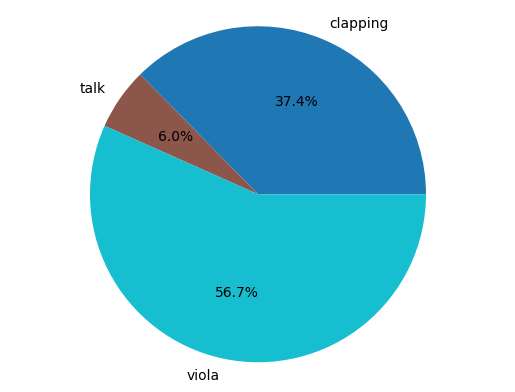

In [18]:
#______________pi_distrubution_____________________

import matplotlib.pyplot as plt
import matplotlib.cm as cm

def plot_pie_chart(data):
    labels = data.keys()
    sizes = data.values()

    num_slices = len(data)
    colors = iter(cm.tab10(np.linspace(0, 1, num_slices)))

    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
    plt.show()


plot_pie_chart(count)

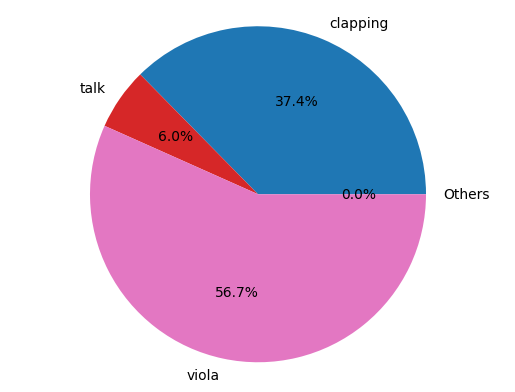

In [19]:
#______________pi_distrubution up to 1%_____________________
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

def plot_pie_chart(data):
    labels = data.keys()
    sizes = list(data.values())

    total = sum(sizes)
    threshold = total * 0.01  # 1% threshold

    # Filter out the slices that are less than the threshold
    filtered_data = {k: v for k, v in data.items() if v >= threshold}

    # Combine the slices below the threshold into a single "Others" category
    others_count = sum(v for v in data.values() if v < threshold)
    filtered_data['Others'] = others_count

    filtered_labels = filtered_data.keys()
    filtered_sizes = filtered_data.values()

    num_slices = len(filtered_data)
    colors = iter(cm.tab10(np.linspace(0, 1, num_slices)))

    plt.pie(filtered_sizes, labels=filtered_labels, colors=colors, autopct='%1.1f%%')
    plt.axis('equal')
    plt.show()

    if others_count > 0:
        print("Classes in Others category:")
        for label, count in data.items():
            if count < threshold:
                print(label)

plot_pie_chart(count)

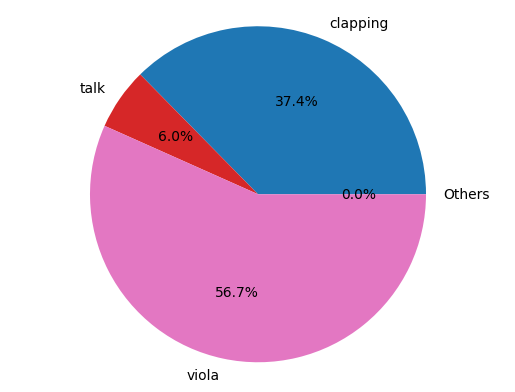

In [20]:
#______________pi_distrubution in the 1%_____________________
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

def plot_pie_chart(data, title=None):
    labels = data.keys()
    sizes = list(data.values())

    total = sum(sizes)
    threshold = total * 0.01  # 1% threshold

    # Filter out the slices that are less than the threshold
    filtered_data = {k: v for k, v in data.items() if v >= threshold}

    # Combine the slices below the threshold into a single "Others" category
    others_count = sum(v for v in data.values() if v < threshold)
    filtered_data['Others'] = others_count

    filtered_labels = filtered_data.keys()
    filtered_sizes = filtered_data.values()

    num_slices = len(filtered_data)
    colors = iter(cm.tab10(np.linspace(0, 1, num_slices)))

    plt.pie(filtered_sizes, labels=filtered_labels, colors=colors, autopct='%1.1f%%')
    plt.axis('equal')
    plt.title(title)  # Set the chart title
    plt.show()

    if others_count > 0:
        others_data = {k: v for k, v in data.items() if v < threshold}
        plot_pie_chart(others_data, title='Others')



plot_pie_chart(count)

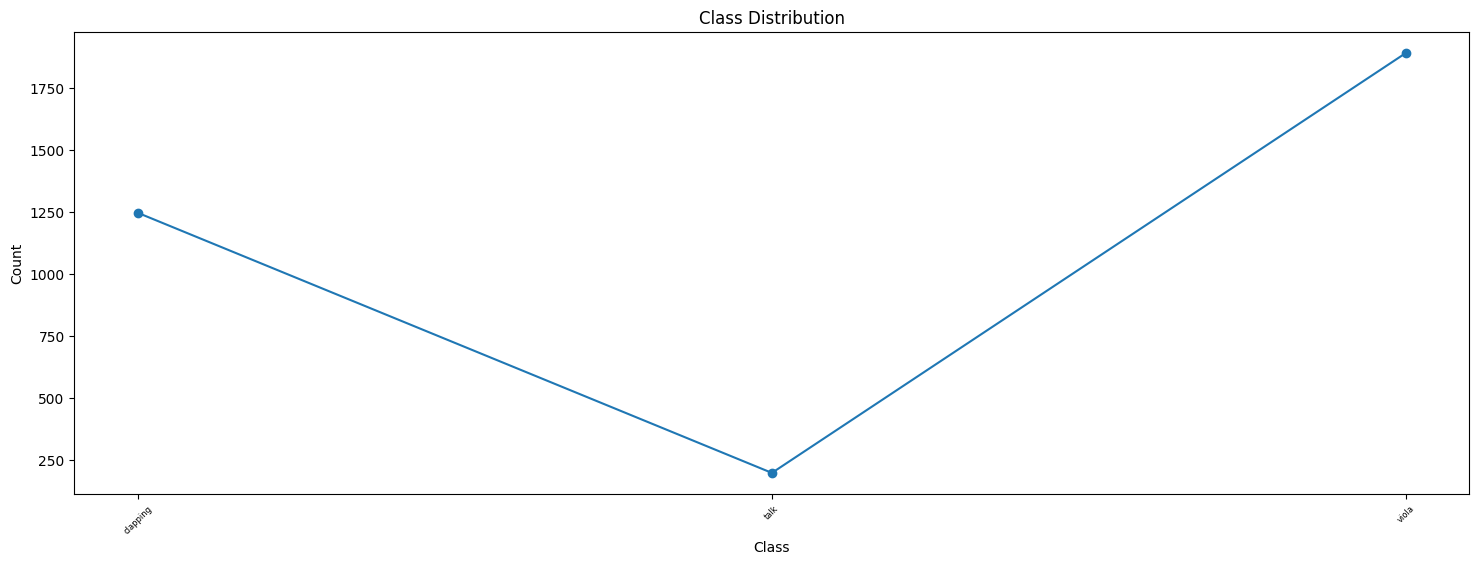

In [21]:
import matplotlib.pyplot as plt

def plot_line_chart(data):
    labels = list(data.keys())
    counts = list(data.values())

    plt.figure(figsize=(18, 6))
    plt.plot(labels, counts, marker='o')
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.title('Class Distribution')
    plt.xticks(rotation=45, fontsize=6)  # Adjust the fontsize for x-axis labels
    plt.show()



plot_line_chart(count)

*Cleaning Data*

In [22]:
# y = y_clean
# X = X_clean

Prepering Data


Parameters for MFCC

In [23]:
# Parameters
# Signal Processing Parameters
fs = 44100         # Sampling Frequency
n_fft = 2048       # length of the FFT window
hop_length = 512   # Number of samples between successive frames
n_mels = 128       # Number of Mel bands
n_mfcc = 13        # Number of MFCCs

# Machine Learning Parameters
testset_size = 0.25 #Percentage of data for Testing
n_neighbors=1       # Number of neighbors for kNN Classifier


Function to Calculate Audio Features: MFCC

In [24]:
# Define Function to Calculate MFCC, Delta_MFCC and Delta2_MFCC
def get_features(signal, sr = 44100):
    S = librosa.feature.melspectrogram(y= signal, sr=sr, n_mels=n_mels)
    mfcc = librosa.feature.mfcc(S=librosa.power_to_db(S), n_mfcc=n_mfcc)
    feature_vector = np.mean(mfcc,1)
    feature_vector = (feature_vector-np.mean(feature_vector))/np.std(feature_vector)
    return feature_vector


In [25]:
files

['audio\\clapping\\1-104089-A-22_0.wav',
 'audio\\clapping\\1-104089-B-22_0.wav',
 'audio\\clapping\\1-105224-A-22_0.wav',
 'audio\\clapping\\1-110537-A-22_0.wav',
 'audio\\clapping\\1-115920-A-22_0.wav',
 'audio\\clapping\\1-115920-B-22_0.wav',
 'audio\\clapping\\1-115921-A-22_0.wav',
 'audio\\clapping\\1-94036-A-22_0.wav',
 'audio\\clapping\\2-25292-A-22_0.wav',
 'audio\\clapping\\2-57733-A-22_0.wav',
 'audio\\clapping\\2-60900-A-22_0.wav',
 'audio\\clapping\\2-76408-A-22_0.wav',
 'audio\\clapping\\2-76408-B-22_0.wav',
 'audio\\clapping\\2-76408-C-22_0.wav',
 'audio\\clapping\\2-76408-D-22_0.wav',
 'audio\\clapping\\3-130330-A-22_0.wav',
 'audio\\clapping\\3-138114-A-22_0.wav',
 'audio\\clapping\\3-149465-A-22_0.wav',
 'audio\\clapping\\3-177082-A-22_0.wav',
 'audio\\clapping\\3-177083-A-22_0.wav',
 'audio\\clapping\\3-181278-A-22_0.wav',
 'audio\\clapping\\3-197435-A-22_0.wav',
 'audio\\clapping\\4-189828-A-22_0.wav',
 'audio\\clapping\\4-189830-A-22_0.wav',
 'audio\\clapping\\4-189


Load audio files, calculate features and create feature vectors

In [26]:
# Load audio files, calculate features and create feature vectors
feature_vectors = []
sound_paths = []
duration = []

for i,f in enumerate(files):
    if (i % 100 == 0):
        print(f"get {i+1} of {len(files)} = {f}")
    try:
        signal, sr = librosa.load(f, sr=fs)
        yt, index = librosa.effects.trim(signal,top_db=60) #Trim
        duration.append(librosa.get_duration(yt, sr=fs))

        signal/=signal.max() #Normalize
        if len(signal) < 2:
            print("Error loading %s" % f)
            continue
        feat = get_features(signal, sr)
        feature_vectors.append(feat)
        sound_paths.append(f)
    except Exception as e:
        print("Error loading %s. Error: %s" % (f,e))
        
print("Calculated %d feature vectors"%len(feature_vectors))


get 1 of 3340 = audio\clapping\1-104089-A-22_0.wav


get 101 of 3340 = audio\clapping\6-1303 (1056).wav
get 201 of 3340 = audio\clapping\6-1303 (1146).wav
get 301 of 3340 = audio\clapping\6-1303 (144).wav
get 401 of 3340 = audio\clapping\6-1303 (235).wav
get 501 of 3340 = audio\clapping\6-1303 (325).wav
get 601 of 3340 = audio\clapping\6-1303 (415).wav
get 701 of 3340 = audio\clapping\6-1303 (505).wav
get 801 of 3340 = audio\clapping\6-1303 (596).wav
get 901 of 3340 = audio\clapping\6-1303 (686).wav
get 1001 of 3340 = audio\clapping\6-1303 (776).wav
get 1101 of 3340 = audio\clapping\6-1303 (866).wav
get 1201 of 3340 = audio\clapping\6-1303 (956).wav
get 1301 of 3340 = audio\talk\WhatsApp Audio 2023-06-11 at 15_146.wav
get 1401 of 3340 = audio\talk\WhatsApp Audio 2023-06-11 at 15_57.wav
get 1501 of 3340 = audio\viola\Viola_Solo_1016.wav
get 1601 of 3340 = audio\viola\Viola_Solo_1106.wav
get 1701 of 3340 = audio\viola\Viola_Solo_1197.wav
get 1801 of 3340 = audio\viola\Viola_Solo_1287.wav
get 1901 of 3340 = audio\viola\Viola_Solo_1377.wav
g

In [27]:
print("Max. Duration:", max(duration))
print("Min. Duration:", min(duration))
print("Average Duration:", np.mean(duration))

Max. Duration: 3.0
Min. Duration: 3.0
Average Duration: 3.0


Duration average: 3.0


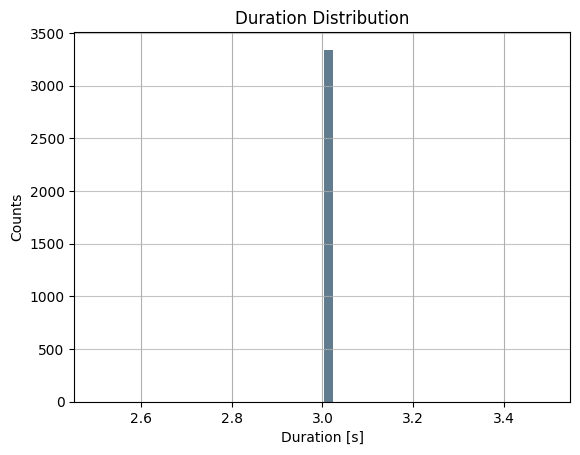

In [28]:
durationDist = pd.Series(np.array(duration))
plt.figure()
durationDist.plot.hist(grid=True, bins=40, rwidth=0.8,
                   color='#607c8e')
plt.title('Duration Distribution')
plt.xlabel('Duration [s]')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.75)
# plt.xlim(0, 11)
print("Duration average:",np.mean(duration))

Spectogram Array Shape: (1025, 87)


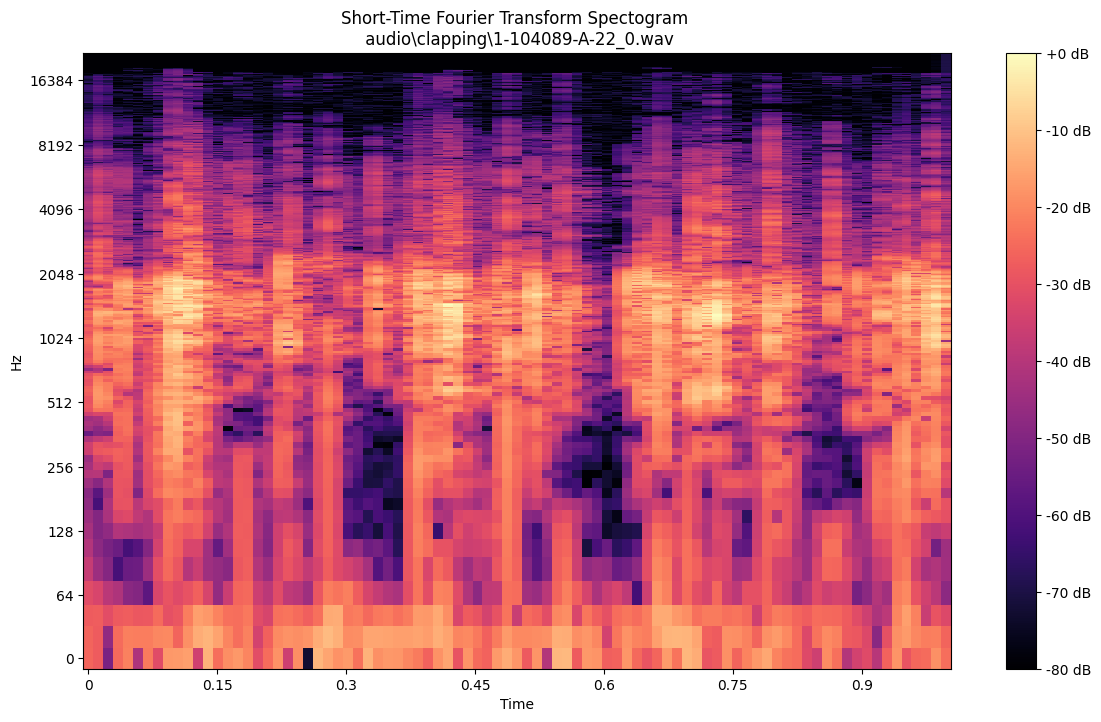

In [29]:
# STFT Example
y, sr = librosa.load(files[10], sr=fs, duration=1)
y/=y.max() #Normalize
duration_in_samples=librosa.time_to_samples(1, sr=fs)
y_pad = librosa.util.fix_length(y, duration_in_samples) #Pad to 1s if smaller
y_stft=librosa.core.stft(y_pad, n_fft=n_fft, hop_length=hop_length)
y_spec=librosa.amplitude_to_db(abs(y_stft), np.max)
plt.figure(figsize=(14,8))
plt.title("Short-Time Fourier Transform Spectogram \n %s"%files[0])
librosa.display.specshow(y_spec,sr=fs,y_axis='log', x_axis='time')
plt.colorbar(format='%+2.0f dB')
print("Spectogram Array Shape:",y_spec.shape)
ipd.Audio(y, rate=fs)

In [30]:
# Scale features using Standard Scaler
scaler = StandardScaler()
scaled_feature_vectors = scaler.fit_transform(np.array(feature_vectors))
print("Feature vectors shape:",scaled_feature_vectors.shape)

Feature vectors shape: (3340, 13)


Process

In [31]:
# Binary encoding of labels
X_binary, y_binary = binary_encoding(feature_vectors,labels)

print(f"binary val: {y_binary}")
print(np.shape(y_binary))

binary val: [0 0 0 ... 2 2 2]
(3340,)


In [32]:
#normalize X (no need for y cues it [0,1])
X_normelize = normalize(X_binary)
y_normelize = normalize(y_binary)

print(f"normalize val: {X_normelize}")

normalize val: [[0.52361766 0.46914826 0.48888025 ... 0.51246444 0.70295259 0.47769558]
 [0.57063991 0.50213489 0.46914917 ... 0.48498084 0.7092287  0.42317276]
 [0.68058456 0.60327713 0.4271862  ... 0.6316369  0.46001927 0.47893577]
 ...
 [0.4705864  0.48562924 0.58686865 ... 0.47185121 0.48420919 0.51391313]
 [0.49826962 0.5167616  0.54233188 ... 0.43912985 0.4396929  0.52079899]
 [0.50880673 0.51592326 0.51118918 ... 0.509711   0.48476825 0.63285907]]


In [33]:
fetur_shape = np.shape(X_normelize)

In [34]:
# Check if there are feturs depand one another 
# Scatter plot 
# scatter_plot(X_normelize, y_normelize, k = 1, rows = fetur_shape[1], cols = fetur_shape[1])


Train and Test Sets

In [35]:
X_df = pd.DataFrame(X_normelize)
X_df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.523618,0.469148,0.488880,0.580974,0.449593,0.653479,0.470457,0.662663,0.434217,0.701702,0.512464,0.702953,0.477696
1,0.570640,0.502135,0.469149,0.569831,0.434426,0.685530,0.464574,0.646373,0.347430,0.699526,0.484981,0.709229,0.423173
2,0.680585,0.603277,0.427186,0.516824,0.457857,0.506678,0.563513,0.430391,0.706977,0.429166,0.631637,0.460019,0.478936
3,0.919172,0.611685,0.420538,0.443757,0.436718,0.575072,0.427271,0.391819,0.275566,0.481781,0.416049,0.455536,0.391726
4,0.429662,0.372953,0.547308,0.488149,0.527783,0.587703,0.586885,0.590365,0.651755,0.659869,0.643570,0.653643,0.569987
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3335,0.464307,0.475226,0.575309,0.488303,0.566427,0.499370,0.563482,0.498300,0.572372,0.531250,0.540267,0.505606,0.529857
3336,0.467621,0.480952,0.588529,0.471954,0.569418,0.510603,0.553327,0.494638,0.560479,0.511798,0.526715,0.505112,0.489249
3337,0.470586,0.485629,0.586869,0.484438,0.568287,0.503232,0.551534,0.506545,0.583642,0.501866,0.471851,0.484209,0.513913
3338,0.498270,0.516762,0.542332,0.552994,0.556519,0.525045,0.548860,0.514894,0.538450,0.476632,0.439130,0.439693,0.520799


In [36]:
y_df = pd.Series(y_binary)
y_df

0       0
1       0
2       0
3       0
4       0
       ..
3335    2
3336    2
3337    2
3338    2
3339    2
Length: 3340, dtype: int32

In [37]:
# Create Train and Test Set
# train-cross_validation_set split: Hold out the cross_validation_set set for final model evaluation
# The meaning of stratify is to go seperet 0,1 equel
# there for shuffle need to be true
# X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, stratify=y_df , train_size=0.7, shuffle=True)

# print(f"X_train: {np.shape(X_train)}, X_test: {np.shape(X_test)}")
# print(f"y_train: {np.shape(y_train)}, y_test: {np.shape(y_test)}")
# Create Train and Test Set
splitter = StratifiedShuffleSplit(n_splits=1, test_size=testset_size, random_state=0)
splits = splitter.split(scaled_feature_vectors, classes_num)

for train_index, test_index in splits:
    train_set = scaled_feature_vectors[train_index]
    test_set = scaled_feature_vectors[test_index]
    train_classes = classes_num[train_index]
    test_classes = classes_num[test_index]

print(f"X_train: {np.shape(train_set)}, X_test: {np.shape(test_set)}")
print(f"y_train: {np.shape(train_classes)}, y_test: {np.shape(test_classes)}")

X_train = train_set
X_test = test_set
y_train = train_classes
y_test = test_classes

X_train: (2505, 13), X_test: (835, 13)
y_train: (2505,), y_test: (835,)


In [38]:
# Check Set Shapes
print("train_set shape:",train_set.shape)
print("test_set shape:",test_set.shape)
print("train_classes shape:",train_classes.shape)
print("test_classes shape:",test_classes.shape)

train_set shape: (2505, 13)
test_set shape: (835, 13)
train_classes shape: (2505,)
test_classes shape: (835,)


In [39]:
 
n_neighbors=1  # KNN Classifier


# Models : KNN Classifier ; Logistic Regression ; Linear Discriminant Analysis ; Decision Tree ; Random Forest ; NN ; Ada Boost 
KNN = KNeighborsClassifier(n_neighbors=n_neighbors)
LR = LogisticRegression(solver='liblinear', class_weight='balanced', max_iter=100, random_state=42)
LD = LinearDiscriminantAnalysis()
DT = DecisionTreeClassifier()
RF = RandomForestClassifier(n_estimators=100, random_state=42)
NN = MLPClassifier(hidden_layer_sizes=(15,), random_state=42, max_iter=100, warm_start=True)
AB = AdaBoostClassifier(n_estimators=100, learning_rate=1, random_state=42, algorithm='SAMME') #we train 10 model

# # more models:
# model_svm = LinearSVC(random_state=0, tol=1e-5, max_iter=5000)
# svclassifier = SVC(kernel='rbf', C = 10.0, gamma=0.1) 

In [40]:
print(type(X_train))
print(type(y_train))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [41]:
from sklearn import utils
utils.multiclass.type_of_target(y_train)

'multiclass'

In [42]:
# Train models original data
# prepare models

LR.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', random_state=42, solver='liblinear')

# Train models process data
# prepare models

In [43]:
models_p = []

In [44]:
models_p.append(('KNN', KNN.fit(X_train, y_train)))

In [45]:
models_p.append(('LR', LR.fit(X_train, y_train)))

In [46]:
models_p.append(('LR', LR.fit(X_train, y_train)))

In [47]:
models_p.append(('LD', LD.fit(X_train, y_train)))

In [48]:
models_p.append(('DT', DT.fit(X_train, y_train)))

In [49]:
models_p.append(('RF', RF.fit(X_train, y_train)))

In [50]:
models_p.append(('NN', NN.fit(X_train, y_train)))

In [51]:
models_p.append(('AdaBoost', AB.fit(X_train, y_train)))

# COptimizer
# prepare models

In [52]:
models_OvR = []

In [53]:
models_OvR.append(('KNN', OneVsRestClassifier(KNN).fit(X_train, y_train)))

In [54]:
models_OvR.append(('LR', OneVsRestClassifier(LR).fit(X_train, y_train)))

In [55]:
models_OvR.append(('LD', OneVsRestClassifier(LD).fit(X_train, y_train)))

In [56]:
models_OvR.append(('DT', OneVsRestClassifier(DT).fit(X_train, y_train)))

In [57]:
models_OvR.append(('RF', OneVsRestClassifier(RF).fit(X_train, y_train)))

In [58]:
models_OvR.append(('NN', OneVsRestClassifier(NN).fit(X_train, y_train)))

In [59]:
models_OvR.append(('AdaBoost', OneVsRestClassifier(AB).fit(X_train, y_train)))

KNN, cv_results: mean accurecy = 0.9976031872509961, score = 0.0026513848138450978
LR, cv_results: mean accurecy = 0.9892207171314741, score = 0.005659902693511949
LR, cv_results: mean accurecy = 0.9892207171314741, score = 0.005659902693511949
LD, cv_results: mean accurecy = 0.9944111553784861, score = 0.004787804011538143
DT, cv_results: mean accurecy = 0.9900175298804781, score = 0.003685282308529488
RF, cv_results: mean accurecy = 0.996403187250996, score = 0.004882365290868646
NN, cv_results: mean accurecy = 0.99280796812749, score = 0.005309012365013709
AdaBoost, cv_results: mean accurecy = 0.9876223107569722, score = 0.00787264238480813


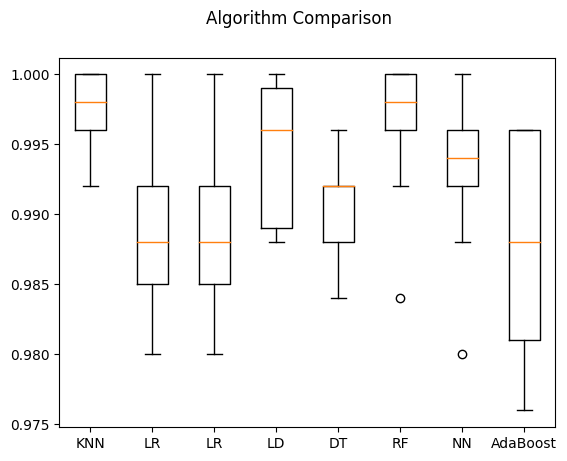

In [60]:
# Compare Algorithms process data
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'

# prepare configuration for cross validation test harness
seed = 7

for name, model in models_p:

	# train each model seperetly (10 times)
	kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True) 
	# opional: 
	# sklean.model_selection.StratifiedKFold(n_splits=10, random_state=seed, shuffle=True)

	cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)

	results.append(cv_results)
	names.append(name)

	print(f"{name}, cv_results: mean accurecy = {cv_results.mean()}, score = {cv_results.std()}")

# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

KNN, cv_results: mean accurecy = 0.9976031872509961, score = 0.0026513848138450978
LR, cv_results: mean accurecy = 0.9880239043824701, score = 0.004373125858482759
LD, cv_results: mean accurecy = 0.9828286852589642, score = 0.01028488968776959
DT, cv_results: mean accurecy = 0.9880239043824701, score = 0.006670472609794481
RF, cv_results: mean accurecy = 0.996403187250996, score = 0.004882365290868646
NN, cv_results: mean accurecy = 0.9940111553784859, score = 0.004813349478384084
AdaBoost, cv_results: mean accurecy = 0.9980031872509961, score = 0.0026809124622582496


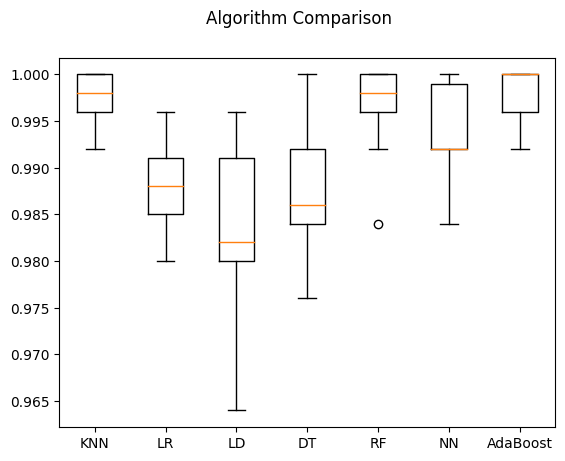

In [61]:
# Compare Algorithms process data
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'

# prepare configuration for cross validation test harness
seed = 7

for name, model in models_OvR:

	# train each model seperetly (10 times)
	kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True) 
	# opional: 
	# sklean.model_selection.StratifiedKFold(n_splits=10, random_state=seed, shuffle=True)

	cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)

	results.append(cv_results)
	names.append(name)

	# # another way to calculate mean accuracy
	# cv_score_lr = model_selection.cross_val_score(model,X_train,y_train, cv= kfold)
	# print(cv_score_lr)
	# mean_accuracy_lr = sum(cv_score_lr)/len(cv_score_lr)
	# mean_accuracy_lr = mean_accuracy_lr*100
	# mean_accuracy_lr = round(mean_accuracy_lr,2) #tow numbers after the dot
	# print(mean_accuracy_lr)

	print(f"{name}, cv_results: mean accurecy = {cv_results.mean()}, score = {cv_results.std()}")

# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [62]:
# #ROC curv original data
# roc_plot(models_p, X_test, y_test)

# #ROC curv optimeize models
# roc_plot(models_OvR, X_test, y_test)

In [63]:
# Predict using the Test Set
predicted_labels = KNN.predict(test_set)


Evaluation

In [64]:
#labels
print(set(labels))

# Recall - the ability of the classifier to find all the positive samples
print("Recall: ", recall_score(test_classes, predicted_labels,average=None))

# Precision - The precision is intuitively the ability of the classifier not to 
#label as positive a sample that is negative
print("Precision: ", precision_score(test_classes, predicted_labels,average=None))

# F1-Score - The F1 score can be interpreted as a weighted average of the precision 
#and recall
print("F1-Score: ", f1_score(test_classes, predicted_labels, average=None))

# Accuracy - the number of correctly classified samples
print("Accuracy: %.2f  ," % accuracy_score(test_classes, predicted_labels,normalize=True), accuracy_score(test_classes, predicted_labels,normalize=False) )
print("Number of samples:",test_classes.shape[0])

{'clapping', 'talk', 'viola'}
Recall:  [0.99358974 1.         1.        ]
Precision:  [1.         1.         0.99578947]
F1-Score:  [0.99678457 1.         0.9978903 ]
Accuracy: 1.00  , 833
Number of samples: 835


In [65]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(test_classes, predicted_labels)
np.set_printoptions(precision=2)

In [66]:
# Function to Plot Confusion Matrix
# http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    """
    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
                 
    # sns.heatmap(df_cm, annot=True, cmap='viridis')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

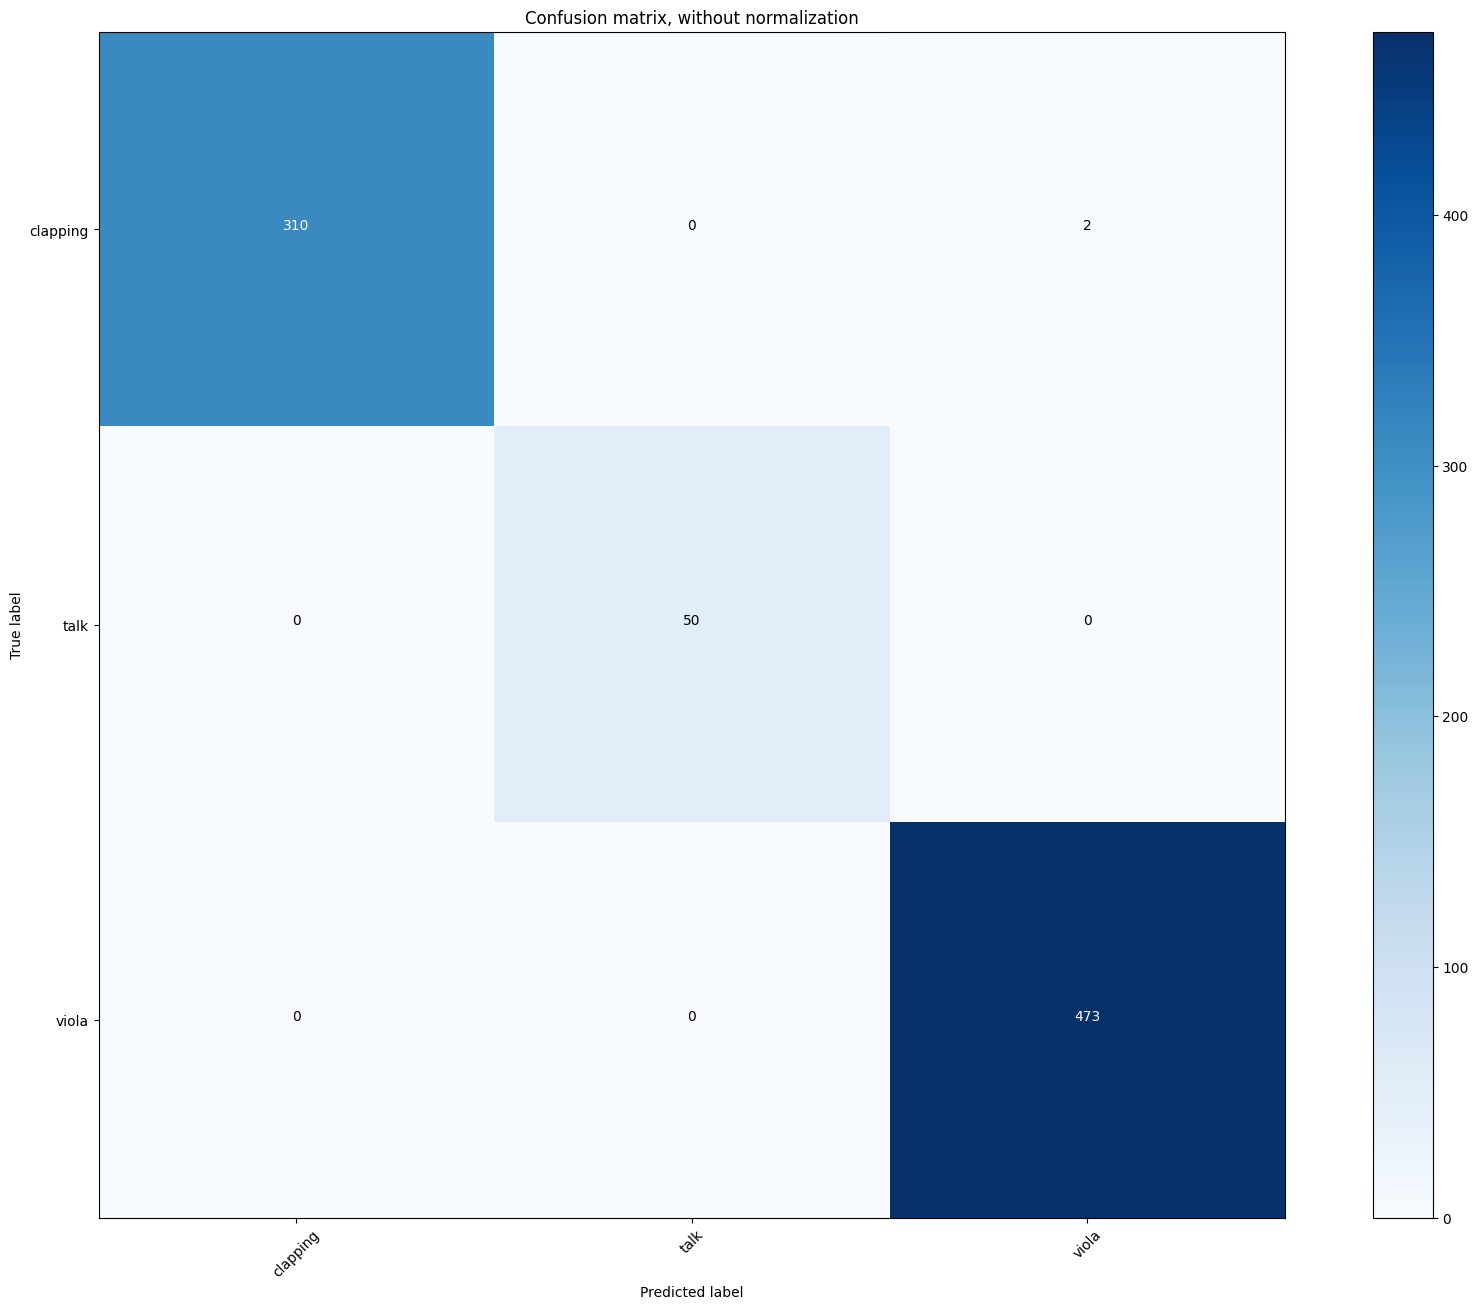

In [67]:
# Plot non-normalized confusion matrix
plt.figure(figsize=(18,13))
plot_confusion_matrix(cnf_matrix, classes=labelencoder.classes_,
                      title='Confusion matrix, without normalization')

In [68]:
# Find wrong predicted samples indexes
#wrong_predictions = [i for i, (e1, e2) in enumerate(zip(test_classes, predicted_labels)) if e1 != e2]
wrong_predictions = [i for i, (e1, e2) in enumerate(zip(predicted_labels,test_classes)) if e1 != e2]

In [69]:
# Find wrong predicted audio files
print(np.array(labels)[test_index[wrong_predictions]])
print(predicted_labels[wrong_predictions].T)
print(labelencoder.inverse_transform(predicted_labels[wrong_predictions]))
print(np.array(files)[test_index[wrong_predictions]])

['clapping' 'clapping']
[2 2]
['viola' 'viola']
['audio\\clapping\\2-76408-A-22_0.wav'
 'audio\\clapping\\5-221950-A-22_0.wav']
